<center><font size = "10"> Week 11 - Extracellular Response<center>
<center><font size = "8">Tutorial 03: LFPy 01 <center>

<font size='3'><font color='blue'> In this tutorial we see an example of using [LFPy](https://lfpy.readthedocs.io/en/latest/), a python package for calculation of extracellular potentials from multicompartment neuron models and recurrent networks of multicompartment neurons.
    
<font size='3'><font color='blue'>You can find this example in the tutorials provided by LFPy although it has been adapted to our morphologies.

## Extracellular response of synaptic input

<font size='3'>First step is to import LFPy and other packages for analysis and plotting:

In [1]:
import LFPy
import numpy as np
import matplotlib.pyplot as plt

<font size='3'>Create some dictionarys with parameters for cell, synapse and extracellular electrode:

In [2]:
cellParameters = {
    'morphology' : 'Pyr_01.swc',
    'tstart' : -50,
    'tstop' : 100,
    'dt' : 2**-4,
    'passive' : True,
}

synapseParameters = {
    'syntype' : 'Exp2Syn',
    'e' : 0.,
    'tau1' : 0.5,
    'tau2' : 2.0,
    'weight' : 0.05,
    'record_current' : True,
}

z = np.mgrid[-800:1201:100]
electrodeParameters = {
    'x' : np.zeros(z.size),
    'y' : np.zeros(z.size),
    'z' : z,
    'sigma' : 0.3,
}

<font size='3'>Then, create the cell, synapse and electrode objects using LFPy.Cell, LFPy.Synapse, LFPy.RecExtElectrode.
    
<font size='3'>__IMPORTANT:__ You would probably need to change the rotation angles to be able to align your cell with the line of electrodes.

In [3]:
cell = LFPy.Cell(**cellParameters)
cell.set_pos(x=0, y=0, z=0)

cell.set_rotation(x=4.71239, y=0.0, z=4.71239, rotation_order='xyz') # angles in radians!!


synapse = LFPy.Synapse(cell,
                       idx = cell.get_closest_idx(z=300),
                       **synapseParameters)
synapse.set_spike_times(np.array([10, 30, 50]))
                        
electrode = LFPy.RecExtElectrode(**electrodeParameters)

error Pyr_01.swc line 12052: could not parse: 


<font size='3'>Run the simulation with electrode as input to cell.simulate()

In [4]:
cell.simulate(electrode = electrode)

<font size='3'>Then plot the somatic potential and the LFP from electrode object:

(-1000.0, 1000.0, -800.0, 1200.0)

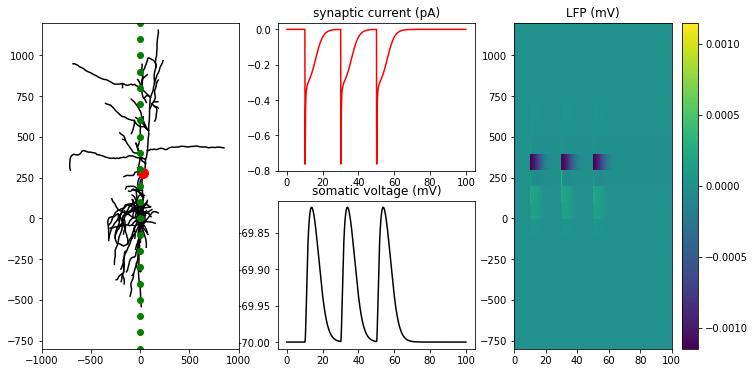

In [5]:
plt.figure(figsize=(12, 6))
plt.subplot(133)
plt.pcolormesh(cell.tvec, electrode.z, electrode.LFP,
           vmin=-abs(electrode.LFP).max(), vmax=abs(electrode.LFP).max())
plt.colorbar()
plt.title('LFP (mV)')

plt.subplot(232)
plt.plot(cell.tvec, synapse.i, 'r'), plt.title('synaptic current (pA)')

plt.subplot(235)
plt.plot(cell.tvec, cell.somav, 'k'), plt.title('somatic voltage (mV)')

plt.subplot(131)
for sec in LFPy.cell.neuron.h.allsec():
    idx = cell.get_idx(sec.name())
    plt.plot(np.r_[cell.xstart[idx], cell.xend[idx][-1]],
            np.r_[cell.zstart[idx], cell.zend[idx][-1]],
            color='k')
plt.plot([cell.synapses[0].x], [cell.synapses[0].z], 
     color='r', marker='o', markersize=10)
plt.plot(electrode.x, electrode.z, '.', marker='o', color='g')
plt.axis([-1000, 1000, -800, 1200])
